In [7]:
import pandas as pd
import numpy as np
import os

In [8]:
%run sqlite_execution.py
db1 = DB_V1()
# delete each model with captcha string diamond bracelet
# db1.con.execute("""DELETE FROM models_v1 WHERE captcha_string = 'diamond bracelet'""")

# db1.drop_duplicates()
# db1.drop_unuseable_images(commit=True)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
bonsai tree,1235,984,251
laptop,1599,569,1030
tree,1989,525,1464
flower,1669,500,1169
diamond bracelet,982,492,490
headphones,1325,414,911
cup of orange juice,1134,406,728
car,1493,359,1134
motorcycle,1335,309,1026
violin,267,267,0


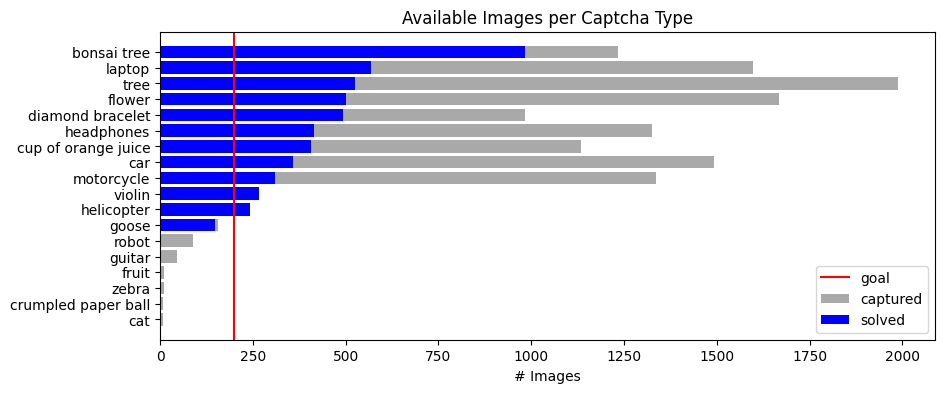

In [9]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [10]:
%run pytorch_training.py
db1.drop_duplicates()
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=50)
train_models_on_all_captcha_strings(db1, threshold=200, save=True, only_updated=True, epochs=50, augment_images=True)

Skipping bonsai tree with 984 samples...
Skipping laptop with 569 samples...
Skipping tree with 525 samples...
Skipping flower with 500 samples...
Training model on diamond bracelet with 492 samples...
Training model on diamond bracelet...
Fount 492 useable images
x shape: (492, 3, 128, 128)
y shape: (492, 1)
train size: 368, test size: 124
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0042, Accuracy: 94/124, 75.81%
Epoch: 2, Test Loss: 0.0031, Accuracy: 107/124, 86.29%
Epoch: 3, Test Loss: 0.0022, Accuracy: 109/124, 87.90%
Epoch: 4, Test Loss: 0.0022, Accuracy: 110/124, 88.71%
Epoch: 5, Test Loss: 0.0015, Accuracy: 115/124, 92.74%
Epoch: 6, Test Loss: 0.0017, Accuracy: 112/124, 90.32%
Epoch: 7, Test Loss: 0.0014, Accuracy: 116/124, 93.55%


KeyboardInterrupt: 

In [ ]:
model_info = db1.get_model_info()
model_info

,date,path,samples,training_samples,testing_samples,accuracy,better_than_90,better_than_95
bonsai tree,2023-08-18,bonsai tree/23-230_01,1720,1472,248,0.959677,0.999856,0.797654
car,2023-08-18,car/23-230_01,615,512,103,0.970874,0.998503,0.893542
cup of orange juice,2023-08-18,cup of orange juice/23-230_02,719,608,111,0.990991,0.999992,0.996632
diamond bracelet,2023-08-20,diamond bracelet/23-232_01,616,512,104,1.000000,1.000000,1.000000
flower,2023-08-18,flower/23-230_01,868,736,132,0.931818,0.920240,0.216006
goose,2023-08-16,goose/23-228_01,131,96,35,0.828571,0.131636,0.007252
headphones,2023-08-18,headphones/23-230_01,899,768,131,0.954198,0.992452,0.643914
helicopter,2023-08-18,helicopter/23-230_01,418,352,66,0.878788,0.338588,0.016911
laptop,2023-08-18,laptop/23-230_06,1023,864,159,0.937107,0.962150,0.273802
motorcycle,2023-08-18,motorcycle/23-230_01,533,448,85,1.000000,1.000000,1.000000


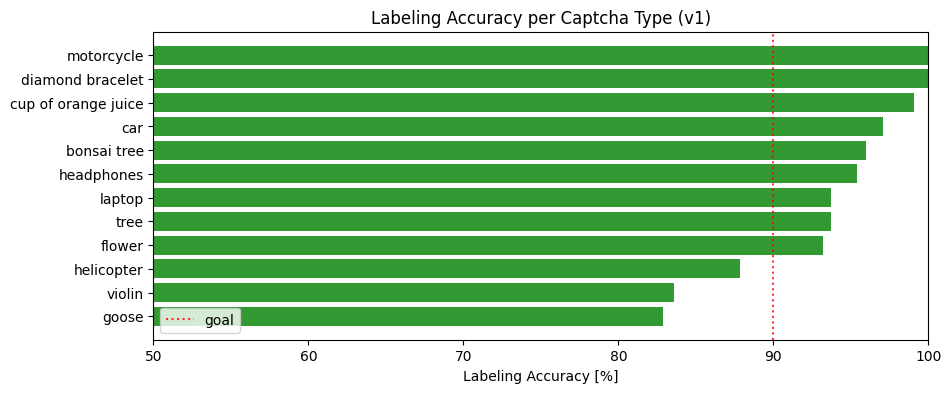

In [ ]:
%run visualizer.py
plot_model_accuracy(model_info)

In [ ]:
db1.load_models_into_src(threshold=0.9)

bonsai tree bonsai tree/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree
car car/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
cup of orange juice cup of orange juice/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
diamond bracelet diamond bracelet/23-232_01
File copied and renamed to: ../src/hcaptcha_solver/models//diamond bracelet
flower flower/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
headphones headphones/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
laptop laptop/23-230_06
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
motorcycle motorcycle/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle
tree tree/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//tree


In [ ]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=1000, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
diamond bracelet: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
diamond bracelet: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
diamond bracelet: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V2
Saved screenshot to ../data/images/v2/top_of_the_lighthouse/20-00-58-12-514861.png
Captcha 

KeyboardInterrupt: 

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

Setting images for tree
Setting images for diamond bracelet
labeled diamond bracelet/19-20-14-03-537476_3.png as True
labeled diamond bracelet/19-20-14-36-277676_8.png as True
labeled diamond bracelet/19-20-15-01-675424_2.png as False
labeled diamond bracelet/19-20-15-39-725472_1.png as True
labeled diamond bracelet/19-20-15-43-638477_2.png as False
labeled diamond bracelet/19-20-15-44-401479_0.png as False
labeled diamond bracelet/19-20-16-38-898737_7.png as True
labeled diamond bracelet/19-20-18-51-909630_5.png as False
labeled diamond bracelet/19-20-18-56-415457_6.png as True
Setting images for diamond bracelet
labeled diamond bracelet/19-20-13-30-987938_2.png as True
labeled diamond bracelet/19-20-14-23-785633_1.png as False
labeled diamond bracelet/19-20-15-05-305091_2.png as False
labeled diamond bracelet/19-20-15-05-305091_6.png as False
labeled diamond bracelet/19-20-16-17-335219_2.png as False
labeled diamond bracelet/19-20-16-43-604295_4.png as False
labeled diamond bracelet/

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))